In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime



In [2]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [3]:
years = []
for i in range(2004,2019):
    years.append(str(i))



In [9]:
years

['2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018']

In [14]:
# A list of Matplotlib releases and their dates
# Taken from https://api.github.com/repos/matplotlib/matplotlib/releases
events = ['Zuckerburg Launched Facebook in his dorm.',
          'Photos feature, tagging',
          'NewsFeed',
          'ads Beacons, Facebook Pages',
          'Facebook Credits for Facebook Gifts',
          'Like button,Aquired FriendFeed',
          'Acquired contact-importing startup and photo-sharing service',
          'Facebook Timeline, Messenger,video chat,launched iPad app',
         'Facebook IPO,real-time ad bidding system, acquired Instagram',
          'Internet.org, video autoplay feature', 
          'Acquired Whatsapp, Oculus(AR),and Titan Aerospace(drone).',
          'InstantArticles for publishers,livestreaming,M assistant', 
          'Messenger Chatbots,Opensource VR camera',
          'Instant Games, FB Journalism Project, Trust Indicator',
          'Facebook Dating,Acquired Bloomsbury AI']

dates = years
dates = [datetime.strptime(ii, "%Y") for ii in dates]

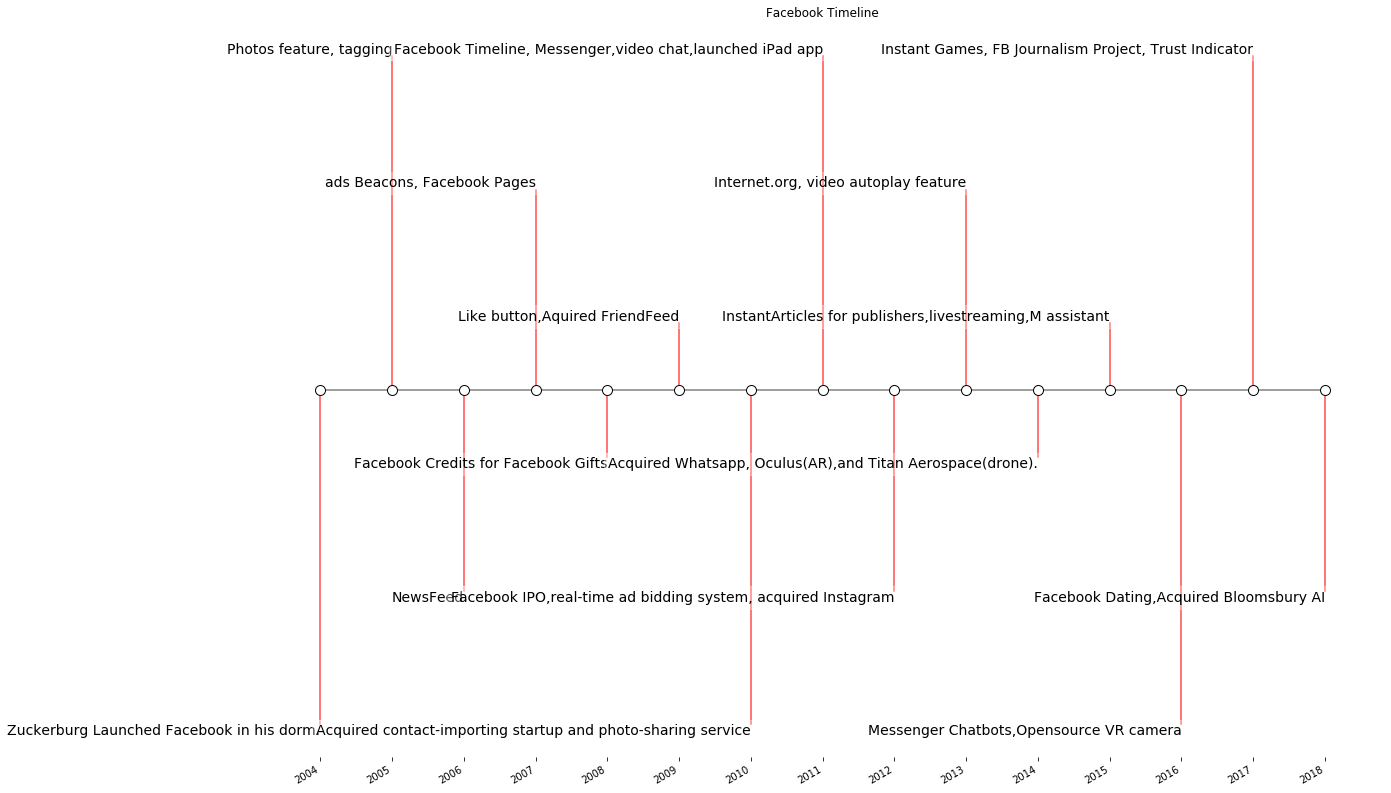

In [15]:
levels = np.array([-5, 5, -3, 3, -1, 1])
fig, ax = plt.subplots(figsize=(20, 15))

# Create the base line
start = min(dates)
stop = max(dates)
ax.plot((start, stop), (0, 0), 'k', alpha=.5)

# Iterate through releases annotating each one
for ii, (iname, idate) in enumerate(zip(events, dates)):
    level = levels[ii % 6]
    vert = 'top' if level < 0 else 'bottom'

    ax.scatter(idate, 0, s=100, facecolor='w', edgecolor='k', zorder=9999)
    # Plot a line up to the text
    ax.plot((idate, idate), (0, level), c='r', alpha=.7)
    # Give the text a faint background and align it properly
    ax.text(idate, level, iname,
            horizontalalignment='right', verticalalignment=vert, fontsize=14,
            backgroundcolor=(1., 1., 1., .3))
ax.set(title="Facebook Timeline")
# Set the xticks formatting

ax.get_xaxis().set_major_locator(mdates.YearLocator())
ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%Y"))
fig.autofmt_xdate()

# Remove components for a cleaner look
plt.setp((ax.get_yticklabels() + ax.get_yticklines() +
          list(ax.spines.values())), visible=False)
# plt.show()

plt.savefig('timeline.pdf',bbox_inches='tight')